# CASA0007 
## Practical 2: Exploratory Data Analysis 2

<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

## Welcome!

In this practical, we will apply the exploratory data analysis techinques to explore the distribution of datasets. 

- Normal distribution 
- Exponentials 
- Logarithms 

In [ ]:
# import relevant packages

import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

## Background 

We're going to continue exploring the schools dataset here. Need a link to the data.

In [27]:
def clean_names(df):
    df.columns = (
        df.columns.str.strip()
                    .str.lower()
                    .str.replace(" ", "_")
                    .str.replace("-", "_")
    )
    return df

In [35]:
# set base path
base = "data/Performancetables_130242/2022-2023/"

# # %% All England schools
# edubase_schools = (
#     pd.read_csv("https://www.dropbox.com/scl/fi/fhzafgt27v30lmmuo084y/edubasealldata20241003.csv?rlkey=uorw43s44hnw5k9js3z0ksuuq&raw=1")
#     .pipe(clean_names)
#     .query("phase_of_education_name == 'Secondary' and establishment_status_name == 'Open'")
# )
# edubase_schools["urn"] = edubase_schools["urn"].astype(str)

# %% Load datasets
na_vals = ["", "NA", "SUPP", "NP", "NE", "SP", "SN", "SUPPMAT"]

england_abs = pd.read_csv(base + "england_abs.csv", na_values=na_vals)
england_census = pd.read_csv(base + "england_census.csv", na_values=na_vals)
england_ks4_mats_performance = pd.read_csv(base + "england_ks4-mats-performance.csv", na_values=na_vals, encoding="latin1")
england_ks4_pupdest = pd.read_csv(base + "england_ks4-pupdest.csv", na_values=na_vals)
england_ks4final = pd.read_csv(base + "england_ks4final.csv", na_values=na_vals)

england_school_information = pd.read_csv(
    base + "england_school_information.csv",
    na_values=na_vals,
    parse_dates=["OFSTEDLASTINSP"],  # adjust if column names differ
    dayfirst=True
)

# %% Type conversions
england_abs["URN"] = england_abs["URN"].astype(str)

england_census["URN"] = england_census["URN"].astype(str)
england_census.iloc[:, 4:23] = england_census.iloc[:, 4:23].apply(pd.to_numeric, errors="coerce")

england_ks4_mats_performance["TRUST_UID"] = england_ks4_mats_performance["TRUST_UID"].astype(str)
england_ks4_mats_performance.iloc[:, 10:67] = england_ks4_mats_performance.iloc[:, 10:67].apply(pd.to_numeric, errors="coerce")

england_ks4_pupdest["URN"] = england_ks4_pupdest["URN"].astype(str)
england_ks4_pupdest.iloc[:, 7:82] = england_ks4_pupdest.iloc[:, 7:82].apply(pd.to_numeric, errors="coerce")

england_ks4final["URN"] = england_ks4final["URN"].astype(str)
# if you know the exact column slice for TOTPUPS:PTOTENT_E_COVID_IMPACTED_PTQ_EE
england_ks4final.loc[:, "TOTPUPS":"PTOTENT_E_COVID_IMPACTED_PTQ_EE"] = (
    england_ks4final.loc[:, "TOTPUPS":"PTOTENT_E_COVID_IMPACTED_PTQ_EE"]
    .apply(pd.to_numeric, errors="coerce")
)

england_school_information["URN"] = england_school_information["URN"].astype(str)

# %% Metadata
base_meta = "data/Performancetables_130249/2022-2023/"

abs_meta = clean_names(pd.read_csv(base_meta + "abs_meta.csv", na_values=na_vals))
census_meta = clean_names(pd.read_csv(base_meta + "census_meta.csv", na_values=na_vals))
ks4_mats_performance_meta = clean_names(pd.read_csv(base_meta + "ks4-mats-performance_meta.csv", na_values=na_vals))
ks4_pupdest_meta = clean_names(pd.read_csv(base_meta + "ks4-pupdest_meta.csv", na_values=na_vals, encoding="latin1"))
ks4final_meta = clean_names(pd.read_excel(base_meta + "ks4_meta.xlsx", na_values=na_vals, engine="openpyxl"))
school_information_meta = clean_names(pd.read_csv(base_meta + "school_information_meta.csv", na_values=na_vals))
la_and_region_codes_meta = clean_names(pd.read_csv(base_meta + "la_and_region_codes_meta.csv", na_values=na_vals))


/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/ipykernel_17127/2288828484.py:19: DtypeWarning: Columns (75,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,144,145,146,147,148,149,150,151,152,177,178,179,180,181,182,183,186,187,188,189,190,191,192,194,195,196,198,199,200,202,203,204,206,207,208,210,211,212,214,215,216,218,219,220,222,223,224,230,233,234,235,236,237,238,239,242,243,244,245,246,247,248,251,252,253,254,255,256,257,266,267,268,269,270,271,272,281,282,283,284,285,286,287,296,297,298,299,300,301,302,311,312,313,314,315,316,317,335,336,337,340,341,342,345,346,347,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410) have mixed types. Specify dtype option on import or set low_memory=False.
  england_ks4final = pd.read_csv(base + "england_ks4final.csv", na_values=na_vals)


In [36]:
england_ks4_mats_performance.head()

,TIME_PERIOD,TIME_IDENTIFIER,TRUST_GROUP_TYPE,TRUST_NAME,TRUST_UID,TRUST_ID,TRUST_COMPANIES_HOUSE_NUMBER,TRUST_UKPRN,TRUST_LEADREGION,INSTITUTIONS_MATPTINC,...,INSTITUTIONS_INMAT,NUMINST_INMAT,NUMINST_CONVERTER_INMAT,NUMINST_SPONSOR_INMAT,NUMINST_FREE_INMAT,NUMINST_STUDIO_INMAT,NUMINST_UTC_INMAT,TPUP_INMAT,PFSM6CLA1A_INMAT,PNOTFSM6CLA1A_INMAT
0,202223,AcademicYear,Multi-academy trusts,ACTIVATE LEARNING EDUCATION TRUST,15710,TR02786,8707909,10060613,South East,139268;141111;142024;145155;145945;146375,...,NaN,6,0,2,0,0,4,647,NaN,NaN
1,202223,AcademicYear,Multi-academy trusts,ACER TRUST,15720,TR01414,9591931,10060976,South East,142104;143984;144008,...,NaN,3,3,0,0,0,0,548,NaN,NaN
2,202223,AcademicYear,Multi-academy trusts,RED KITE LEARNING TRUST,15727,TR00969,7523507,10054307,Yorkshire and the Humber,136497;138304;141883;146247,...,NaN,4,2,1,1,0,0,810,NaN,NaN
3,202223,AcademicYear,Multi-academy trusts,CONSILIUM ACADEMIES,15728,TR00082,9495671,10061209,North East,138314;143059;143845;144199;144200;144937;1449...,...,NaN,8,5,3,0,0,0,1150,NaN,NaN
4,202223,AcademicYear,Multi-academy trusts,BATLEY MULTI ACADEMY TRUST,15729,TR00147,7732537,10059240,Yorkshire and the Humber,137424;137487;142406,...,NaN,3,1,1,1,0,0,520,NaN,NaN


In [37]:
england_ks4_mats_performance.columns

Index(['TIME_PERIOD', 'TIME_IDENTIFIER', 'TRUST_GROUP_TYPE', 'TRUST_NAME',
       'TRUST_UID', 'TRUST_ID', 'TRUST_COMPANIES_HOUSE_NUMBER', 'TRUST_UKPRN',
       'TRUST_LEADREGION', 'INSTITUTIONS_MATPTINC', 'NUMINST_MATPTINC',
       'NUMINST_CONVERTER_MATPTINC', 'NUMINST_SPONSOR_MATPTINC',
       'NUMINST_FREE_MATPTINC', 'NUMINST_STUDIO_MATPTINC',
       'NUMINST_UTC_MATPTINC', 'NUMINST_FSM6CLA1A_MATPTINC',
       'NUMINST_3_MATPTINC', 'NUMINST_4_MATPTINC', 'NUMINST_5PLUS_MATPTINC',
       'TPUP_MATPTINC', 'KS2ASS_MATPTINC', 'PFSM6CLA1A_MATPTINC',
       'PNOTFSM6CLA1A_MATPTINC', 'PEALGRP2_MATPTINC', 'PSEN_ALL4_MATPTINC',
       'ATT8SCR_WGTAVG', 'P8MEACOV', 'P8MEA_WGTAVG', 'P8CILOW', 'P8CIUPP',
       'PTL2BASICS_95_WGTAVG', 'EBACCAPS_WGTAVG', 'PTEBACC_95_WGTAVG',
       'PTEBACC_94_WGTAVG', 'PTEBACC_E_PTQ_EE_WGTAVG',
       'ATT8SCR_WGTAVG_FSM6CLA1A', 'P8MEACOV_FSM6CLA1A',
       'P8MEA_WGTAVG_FSM6CLA1A', 'P8CILOW_FSM6CLA1A', 'P8CIUPP_FSM6CLA1A',
       'PTL2BASICS_95_WGTAVG_FSM6CLA1

In [39]:
england_ks4_mats_performance['PTL2BASICS_95_WGTAVG']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
211    NaN
212    NaN
213    NaN
214    NaN
215    NaN
Name: PTL2BASICS_95_WGTAVG, Length: 216, dtype: object

## Generate some data

In [3]:
import numpy as np
import pandas as pd

# number of schools
n = 132

# school labels
schools = [f"School_{i+1}" for i in range(n)]

# average_grade ~ Normal(80, 5)
average_grade = np.random.normal(loc=80, scale=5, size=n)

# distance_from_city ~ Uniform(1, 50)
distance_from_city = np.random.uniform(1, 50, size=n)

# number_of_students ~ A * exp(-distance) with some noise
A = 4000  # max number of students near the city
number_of_students = A * np.exp(-distance_from_city / 10) + np.random.normal(0, 50, size=n)
number_of_students = np.clip(number_of_students, 50, None)  # avoid negatives

# Build DataFrame
df = pd.DataFrame({
    "school": schools,
    "average_grade": average_grade,
    "distance_from_city": distance_from_city,
    "number_of_students": number_of_students.astype(int)
})

# set school as index
df.set_index("school", inplace=True)


In [4]:
# We can have a look at the dataset:

df.head()

,average_grade,distance_from_city,number_of_students
school,,,
School_1,73.680152,10.703707,1402
School_2,84.397459,5.119498,2371
School_3,87.973996,10.963445,1451
School_4,67.472473,2.979688,2959
School_5,74.025734,37.153812,50


## Summary statistics 

We can print the summary statistics of the dataframe using in-built functions from ```pandas```. 

In [5]:
df.describe()

,average_grade,distance_from_city,number_of_students
count,132.000000,132.000000,132.000000
mean,79.580106,26.768009,702.545455
std,4.952928,14.290017,904.383611
min,66.481772,1.507981,50.000000
25%,76.656064,14.704562,89.000000
50%,79.622907,26.372313,296.500000
75%,83.056603,40.159107,937.500000
max,93.454521,48.910250,3453.000000


### Data distribution

Let's try and figure out what the distribution of the data is - we start by plotting a histogram. 

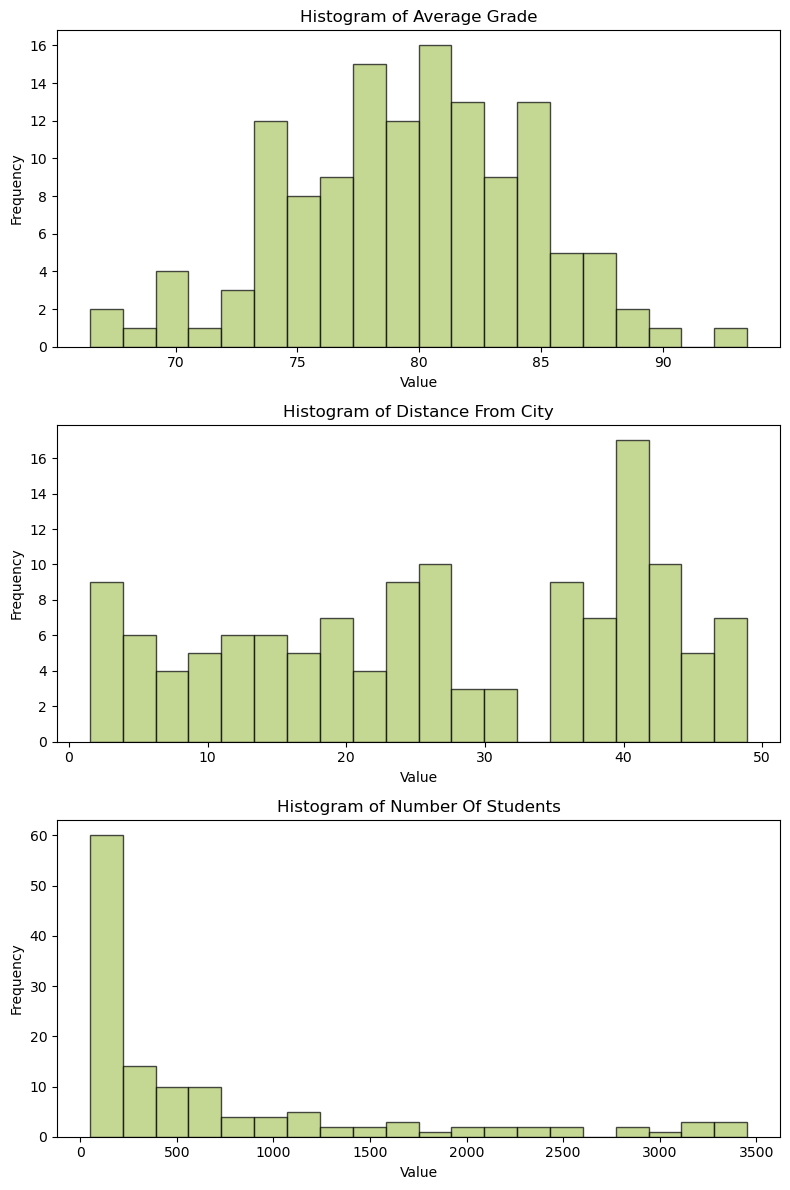

In [ ]:
# Plotting separate histograms for each column
n_bins = 20
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

for ax, column in zip(axes, ["average_grade", "distance_from_city", "number_of_students"]):
    ax.hist(df[column], bins=n_bins, alpha=0.7, color='#abc766', edgecolor='black')
    ax.set_title(f"Histogram of {column.strip('_').replace('_', ' ').title()}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

It could be helpful to try and change the number of bins - try changing the parameter ```n_bins``` in the below code.  

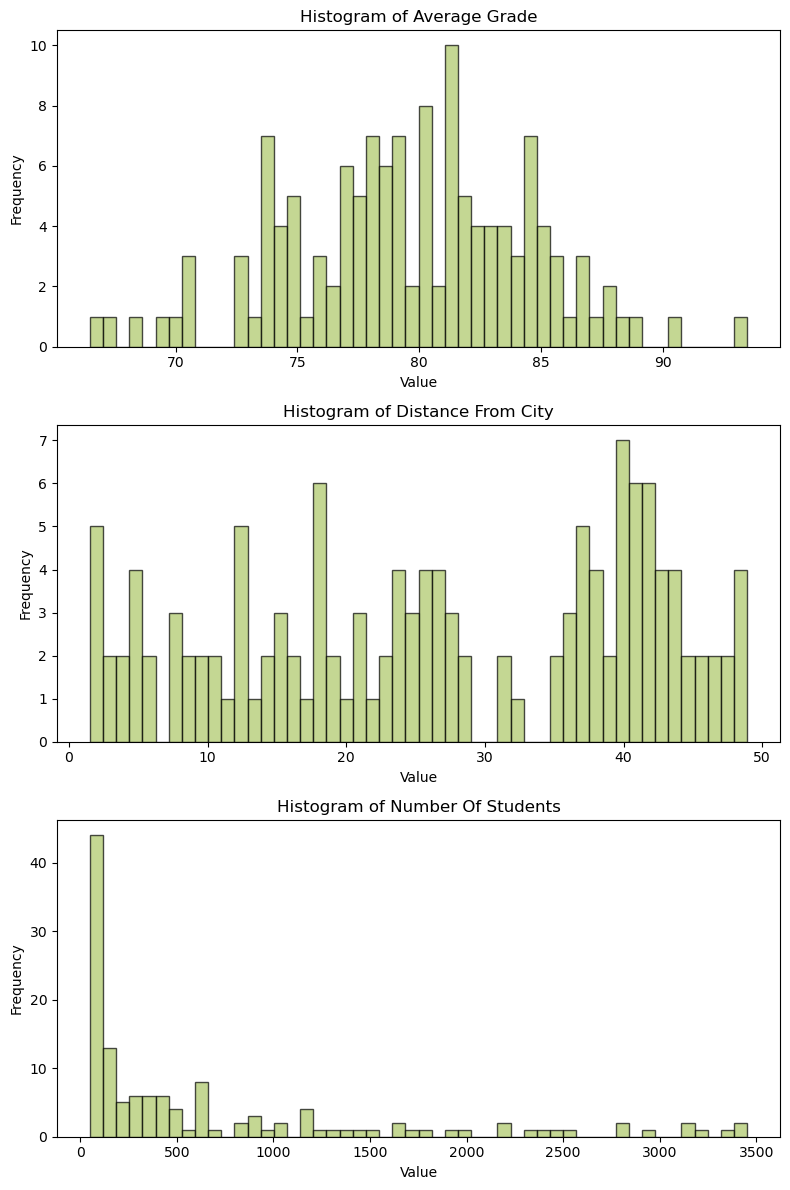

In [16]:
# Plotting separate histograms for each column
n_bins = 50
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

for ax, column in zip(axes, ["average_grade", "distance_from_city", "number_of_students"]):
    ax.hist(df[column], bins=n_bins, alpha=0.7, color='#abc766', edgecolor='black')
    ax.set_title(f"Histogram of {column.strip('_').replace('_', ' ').title()}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## Kernel density estimate (KDE)

Using KDE we can fit a curve to the histogram, which can help us to start analysing the distribution fo the data. 

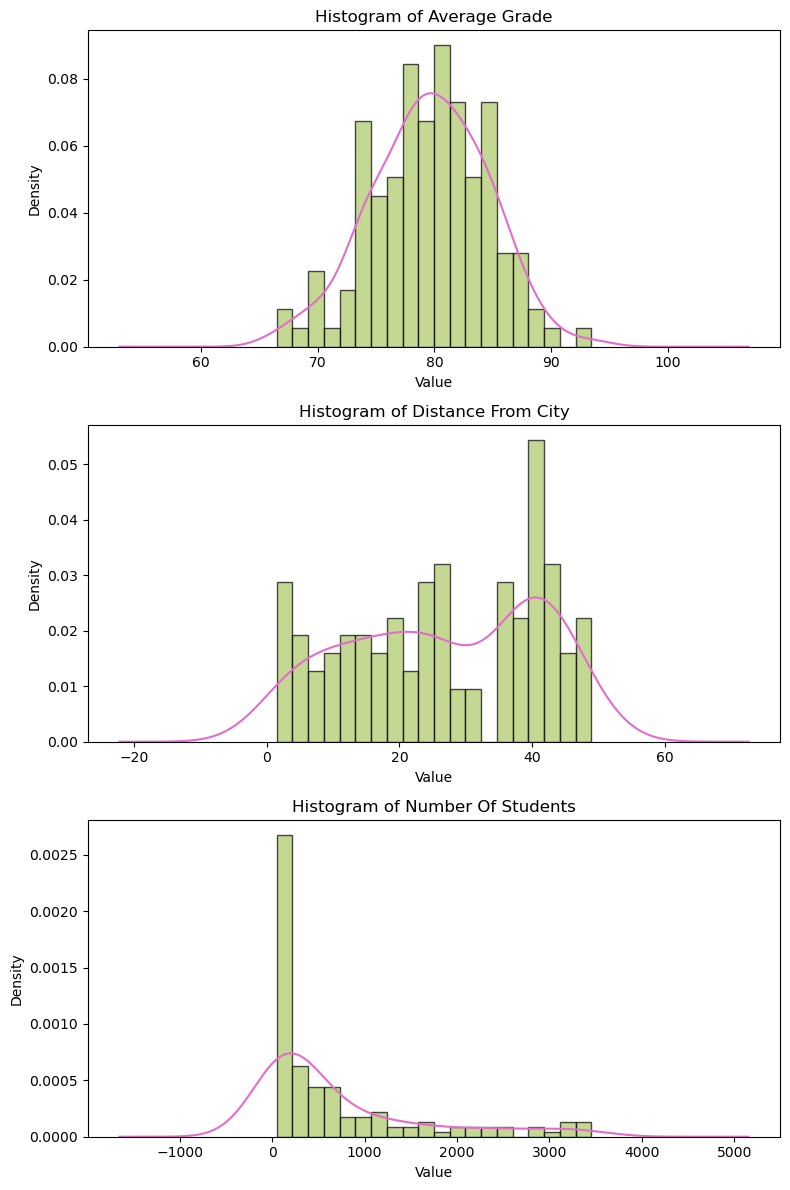

In [17]:
# Plotting separate histograms for each column with KDE fitted 

n_bins = 20
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
for ax, column in zip(axes, ["average_grade", "distance_from_city", "number_of_students"]):
    ax.hist(df[column], bins=n_bins, alpha=0.7, color='#abc766', edgecolor='black', density=True)
    df[column].plot(kind='kde', ax=ax, color="#e16fca")
    ax.set_title(f"Histogram of {column.strip('_').replace('_', ' ').title()}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

## Fitting a normal distribution 

/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/ipykernel_17127/1832083735.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color="#e16fca")


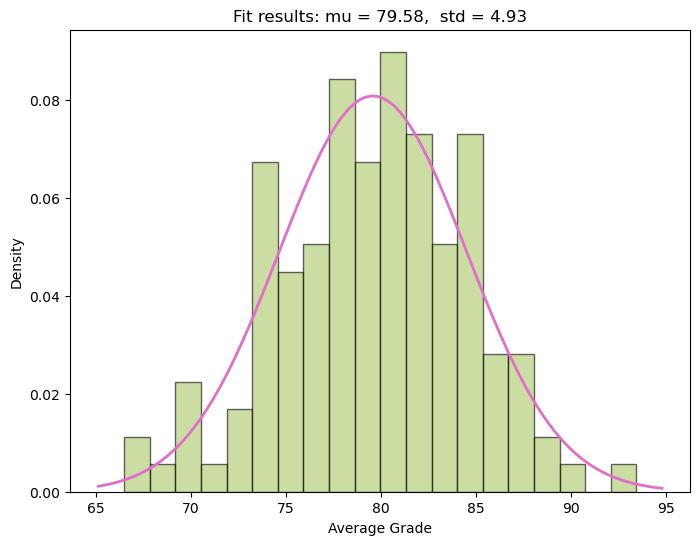

In [24]:
# fit a normal distribution to the average_grade data
mu, std = sps.norm.fit(df["average_grade"])
# plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df["average_grade"], bins=20, density=True, alpha=0.6, color='#abc766', edgecolor='black')
# plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = sps.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color="#e16fca")
title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}"
plt.title(title)
plt.xlabel("Average Grade")
plt.ylabel("Density")
plt.show()

## Use the fitted normal distribution to calculate the probability

In [25]:
# caluclate the probability of a school having an average grade above 90
prob_above_90 = 1 - sps.norm.cdf(90, mu, std)
print(f"Probability of a school having an average grade above 90: {prob_above_90:.4f}")

Probability of a school having an average grade above 90: 0.0174


In [26]:
# calculate the probability of a school having an average grade between 77 and 85

prob_between_77_85 = sps.norm.cdf(85, mu, std) - sps.norm.cdf(77, mu, std)
print(f"Probability of a school having an average grade between 77 and 85: {prob_between_77_85:.4f}")

Probability of a school having an average grade between 77 and 85: 0.5635


## Comparing variables 

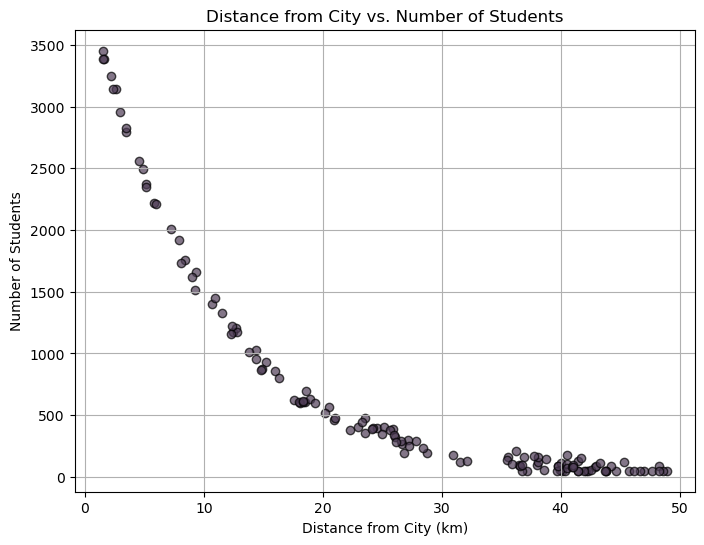

In [19]:
# Plot the distance from the city vs. the number of students 

plt.figure(figsize=(8, 6))
plt.scatter(df["distance_from_city"], df["number_of_students"], alpha=0.7, color='#4e3c56', edgecolor='black')
plt.title("Distance from City vs. Number of Students")
plt.xlabel("Distance from City (km)")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()

It looks like the exponetial distribution!

Let's see what happens when we take the log of each x and y variable. 

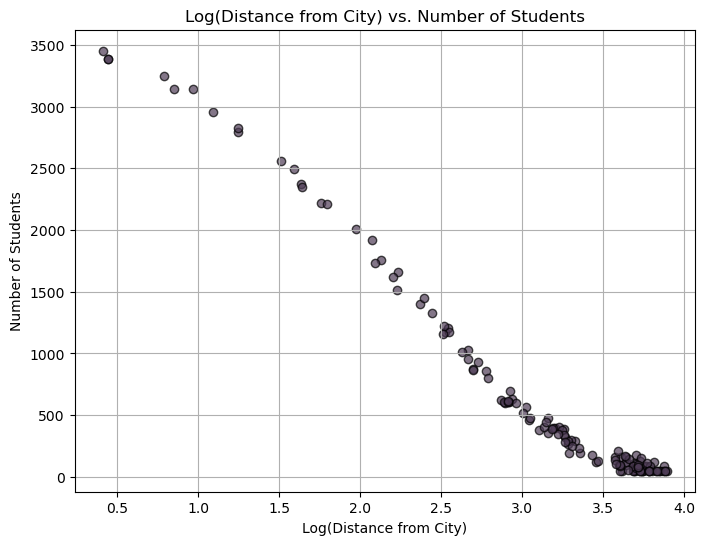

In [23]:
# take the log of distance_from_city 

plt.figure(figsize=(8, 6))  
plt.scatter(np.log(df["distance_from_city"]), df["number_of_students"], alpha=0.7, color='#4e3c56', edgecolor='black')
plt.title("Log(Distance from City) vs. Number of Students")
plt.xlabel("Log(Distance from City)")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()

## Conclusions

We have looked at two datasets from the schools data, and explored their distributions. 

Now, can you try applying these techniques to other datasets and describe your findings in the language of data analysis? 

## Extension 

## Credits
### Contributors:
The following individuals have contributed to these teaching materials: [Bea Taylor](https://github.com/Bea-Taylor)

### License
These teaching materials are licensed under a mix of The MIT License and the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 license.

### Acknowledgements
NA

### Dependencies
This notebook depends on the following libraries: pandas, matplotlib, numpy, scipy